In this lesson, you will learn a little bit about how to use pandas to scrape data off the web.
In Exercises 1-16 below, we scrape and clean the data off of two ESPN websites. In Exercises 17 and onward, we analyze the data.

### Scraping and Cleaning Data Off the Web using pd.read_html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1.) We are interested in how well ESPN does at predicting how well a player will do in fantasy football. 

Go to the ESPN website from 2017 here to see how many fantasy points each player had ACTUALLY scored by the end of the season.

http://games.espn.com/ffl/leaders?

Notice that at the bottom of the Offensive Players tab, it says "Next". Click the next button a few times to see that the url changes slightly. We'll create a list of all of the urls between 0 and 850:

In [4]:
urls = []
for i in range(0,900,50):
    urls.append('http://games.espn.com/ffl/leaders?startIndex='+str(i))

2.We can go to the first url and use pd.read_html to read in the info. "pd.read_html" is an awesome command when it works! It reads tables directly off of websites and saves them to a pandas dataframe. We'll save the dataframe with the name "df".

In [5]:
import pandas as pd
tables = pd.read_html(urls[0])
df = tables[0]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896
0,// load new edition settings var espn = espn ...,OFFENSIVE PLAYERS,NaN,PASSING,NaN,RUSHING,NaN,RECEIVING,NaN,MISC,...,NaN,0.0,5.0,9.0,31.0,0.0,2.0,355.0,NaN,55.0
1,OFFENSIVE PLAYERS,NaN,PASSING,NaN,RUSHING,NaN,RECEIVING,NaN,MISC,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"PLAYER, TEAM POS",NaN,C/A,YDS,TD,INT,NaN,RUSH,YDS,TD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Todd Gurley II, LAR RB",NaN,0/0,0,0,0,NaN,279,1305,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Russell Wilson, Sea QB",NaN,339/553,3983,34,11,NaN,95,586,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


3.There are many columns. Let's only save the player name and points columns. Let's also drop the first three rows which are headers and not player names.

In [6]:
df = df[df.columns[[0,20]]]
df = df.rename(columns={0: 'player', 20: '2017 points'})
df.drop(df.index[0:3], inplace = True)
df.head()

,player,2017 points
3,"Todd Gurley II, LAR RB",383.3
4,"Russell Wilson, Sea QB",347.9
5,"Le'Veon Bell, Pit RB",341.6
6,"Alvin Kamara, NO RB",320.4
7,"Antonio Brown, Pit WR",310.3


4.Okay. Now we are going to loop through and add the dataframes you get from visiting the other urls to the bottom of the dataframe you got from the first url. You can do this by using the following command within the for loop:

table = pd.concat([table, new_table])

We'll be sure to drop the first three rows from the new table that you read in each time before you add them to the old table (since they don't contain player names).  The code is below:

In [7]:
for i in range(1,len(urls)):
    df2 = pd.read_html(urls[i])[0]
    df2 = df2[df2.columns[[0,20]]]
    df2 = df2.rename(columns={0: 'player', 20: '2017 points'})
    df2.drop(df2.index[0:3], inplace = True)
    df = pd.concat([df, df2])
df.head()

,player,2017 points
3,"Todd Gurley II, LAR RB",383.3
4,"Russell Wilson, Sea QB",347.9
5,"Le'Veon Bell, Pit RB",341.6
6,"Alvin Kamara, NO RB",320.4
7,"Antonio Brown, Pit WR",310.3


5.Drop rows that are missing ANY entries. Then, reset the index.

In [8]:
df = df.dropna(how = 'any')
df = df.reset_index(drop=True)
df.head()

,player,2017 points
0,"Todd Gurley II, LAR RB",383.3
1,"Russell Wilson, Sea QB",347.9
2,"Le'Veon Bell, Pit RB",341.6
3,"Alvin Kamara, NO RB",320.4
4,"Antonio Brown, Pit WR",310.3


6.Notice that the player names contain the name, team, and position. We will want to break this up. First, create a list called playernames that just contains the player names and teams (we need the team, too, because there are common names like David Johnson that play on two different teams). 

In [9]:
playernames = []
for player in df['player'].values:
    playername = player.split(',')[0]+', '+player.split(',')[1:][0].split()[0].upper()
    playernames.append(playername)
    print(playername)

Todd Gurley II, LAR
Russell Wilson, SEA
Le'Veon Bell, PIT
Alvin Kamara, NO
Antonio Brown, PIT
DeAndre Hopkins, HOU
Cam Newton, CAR
Tom Brady, NE
Kareem Hunt, KC
Alex Smith, WSH
Melvin Gordon, LAC
Keenan Allen, LAC
Carson Wentz, PHI
Mark Ingram, NO
Kirk Cousins, MIN
Matthew Stafford, DET
Philip Rivers, LAC
LeSean McCoy, BUF
Drew Brees, NO
Larry Fitzgerald, ARI
Ben Roethlisberger, PIT
Dak Prescott, DAL
Jarvis Landry, CLE
Michael Thomas, NO
Jared Goff, LAR
Julio Jones, ATL
Blake Bortles, JAX
Tyreek Hill, KC
Adam Thielen, MIN
Case Keenum, DEN
Carlos Hyde, CLE
Travis Kelce, KC
Leonard Fournette, JAX
Christian McCaffrey, CAR
Matt Ryan, ATL
Rob Gronkowski, NE
A.J. Green, CIN
Marvin Jones Jr., DET
Golden Tate, DET
Doug Baldwin, SEA
Tyrod Taylor, CLE
Davante Adams, GB
Brandin Cooks, LAR
Duke Johnson Jr., CLE
Andy Dalton, CIN
Marcus Mariota, TEN
Derek Carr, OAK
Jacoby Brissett, IND
Demaryius Thomas, DEN
Josh McCown, NYJ
Ezekiel Elliott, DAL
Mike Evans, TB
Dion Lewis, TEN
Zach Ertz, PHI
Jameis Wi

7.We'll create a list called positions that contains just the player positions. We'll do this by splitting the phrase by spaces and saving the very last item in each phrase. In a few cases, if the name ends in something other than position (like 'Q' for questionable of 'SSPD' for suspended), we'll take the second to last item:

In [10]:
positions = []
for player in df['player'].values:
    position = player.split()[-1]
    if position not in ['QB', 'RB', 'WR', 'TE']:
        position = player.split()[-2]
    print(position)
    positions.append(player.split()[-1])

RB
QB
RB
RB
WR
WR
QB
QB
RB
QB
RB
WR
QB
RB
QB
QB
QB
RB
QB
WR
QB
QB
WR
WR
QB
WR
QB
WR
WR
QB
RB
TE
RB
RB
QB
TE
WR
WR
WR
WR
QB
WR
WR
RB
QB
QB
QB
QB
WR
QB
RB
WR
RB
TE
QB
RB
WR
RB
WR
WR
WR
WR
RB
WR
QB
WR
QB
RB
WR
WR
QB
WR
RB
WR
TE
WR
RB
TE
WR
RB
TE
RB
TE
QB
WR
RB
RB
RB
WR
WR
WR
WR
WR
TE
QB
RB
WR
RB
RB
RB
WR
WR
RB
WR
TE
WR
RB
WR
RB
TE
RB
RB
RB
WR
WR
WR
RB
TE
WR
WR
RB
RB
QB
RB
TE
WR
WR
TE
WR
WR
RB
QB
WR
TE
WR
WR
QB
WR
QB
RB
TE
WR
TE
RB
WR
TE
RB
TE
WR
WR
WR
WR
WR
WR
RB
RB
RB
TE
WR
RB
RB
RB
WR
QB
WR
TE
TE
WR
TE
TE
RB
WR
TE
WR
WR
WR
RB
RB
RB
WR
RB
WR
WR
WR
WR
QB
QB
TE
RB
RB
RB
WR
RB
RB
RB
WR
RB
WR
WR
RB
TE
TE
TE
RB
TE
TE
WR
TE
RB
RB
WR
WR
QB
RB
WR
RB
RB
WR
WR
RB
WR
RB
WR
WR
QB
RB
RB
WR
WR
WR
RB
WR
TE
WR
TE
QB
TE
WR
WR
QB
TE
WR
TE
WR
RB
TE
TE
RB
WR
WR
WR
WR
WR
RB
RB
WR
TE
TE
TE
TE
WR
RB
TE
RB
QB
RB
QB
TE
TE
WR
WR
WR
RB
RB
TE
WR
WR
TE
WR
WR
RB
WR
WR
TE
RB
WR
RB
TE
WR
TE
RB
WR
QB
WR
WR
RB
WR
WR
RB
TE
TE
TE
RB
WR
TE
TE
WR
TE
TE
QB
TE
QB
QB
QB
WR
WR
RB
RB
WR
RB
TE
RB
TE
TE
TE
RB
TE
RB
WR
WR
TE
RB
WR
W

8.Create a new data frame called "df1" where the player name called "player" is in the first column, the player position is in the second column, and the 2017 points is in the third column.

In [11]:
df1 = pd.DataFrame(data = {'player': playernames, 
                             'positions': positions, 
                            '2017 points': df['2017 points']})
df1.head()

,player,positions,2017 points
0,"Todd Gurley II, LAR",RB,383.3
1,"Russell Wilson, SEA",QB,347.9
2,"Le'Veon Bell, PIT",RB,341.6
3,"Alvin Kamara, NO",RB,320.4
4,"Antonio Brown, PIT",WR,310.3


9.Now go to this website to see what ESPN projected the player rankings to be BEFORE the season had started:

http://www.espn.com/fantasy/football/story/_/page/17RanksPreseason200PPR/2017-fantasy-football-ppr-rankings-top-200

Use pd.read_html to read the data in. 

10.Save just the Player/Position/Team column to a dataframe called "df2". Rename the column "player".

In [13]:
table2 = pd.read_html('http://www.espn.com/fantasy/football/story/_/page/17RanksPreseason200PPR/2017-fantasy-football-ppr-rankings-top-200')
df2=table2[1]
df2 = df2[['Player/Position/Team']]
df2 = df2.rename(index=str, columns={'Player/Position/Team': 'player'})
df2.head()

,player
0,"1. David Johnson, RB, ARI"
1,"2. Le'Veon Bell, RB, PIT"
2,"3. Antonio Brown, WR, PIT"
3,"4. Ezekiel Elliott, RB, DAL"
4,"5. Odell Beckham Jr., WR, NYG"


11.We want to merge these two data frames. In order to do this, we need the player names to match up exactly. Update the "df2" data frame above to include only the player names and teams.

In [14]:
df2['player'] = [' '.join(player.split()[1:-2])+' '+player.split()[-1] for player in df2['player'] ]
df2.head()

,player
0,"David Johnson, ARI"
1,"Le'Veon Bell, PIT"
2,"Antonio Brown, PIT"
3,"Ezekiel Elliott, DAL"
4,"Odell Beckham Jr., NYG"


12.We'll want to create another column for what ESPN projected their ranking to be. Luckily, since they are in order, an index of 0 correponds to a ranking of 1, an index of 1 corresponds to a ranking of 2, etc. We can use the index and a list comprehension to create a ranking column:

In [15]:
df2['2017 projected ranking'] = [int(x)+1 for x in df2.index]
df2.head()

,player,2017 projected ranking
0,"David Johnson, ARI",1
1,"Le'Veon Bell, PIT",2
2,"Antonio Brown, PIT",3
3,"Ezekiel Elliott, DAL",4
4,"Odell Beckham Jr., NYG",5


13.Okay, we are ready to merge these two dataframes. We'll use "inner" to denote that we only want to consider players that are in BOTH dataframes and we'll use "on=player" to denote that we want to merge the dataframes based on the player column.

In [16]:
results = pd.merge(df1, df2, how='inner', on = ['player'])
results.head()

,player,positions,2017 points,2017 projected ranking
0,"Russell Wilson, SEA",QB,347.9,79
1,"Le'Veon Bell, PIT",RB,341.6,2
2,"Alvin Kamara, NO",RB,320.4,152
3,"Antonio Brown, PIT",WR,310.3,3
4,"DeAndre Hopkins, HOU",Q,309.8,28


14.Drop any rows that have any missing values. There might not be, but perform this operation just in case.

In [17]:
results = results[results['positions'] != 'SSPD']
results = results[results['positions'] != 'Q']
results = results.dropna(how = 'any')

15.View all of the column data types using one command.

In [18]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 120
Data columns (total 4 columns):
player                    98 non-null object
positions                 98 non-null object
2017 points               98 non-null object
2017 projected ranking    98 non-null int64
dtypes: int64(1), object(3)
memory usage: 3.8+ KB


16.Change the data type of 2017 points to a float.

Let's save our cleaned data to a dataset called football.csv so that we can skip all of the previous stuff in the future.

In [4]:
results['2017 points'] = results['2017 points'].astype(float)
results.to_csv('football.csv')

### Analyzing the data

17.Let's read the cleaned football data back in:

In [20]:
results = pd.read_csv('football.csv', index_col = 0)
results.head()

,player,positions,2017 points,2017 projected ranking
0,"Russell Wilson, SEA",QB,347.9,79
1,"Le'Veon Bell, PIT",RB,341.6,2
2,"Alvin Kamara, NO",RB,320.4,152
3,"Antonio Brown, PIT",WR,310.3,3
6,"Tom Brady, NE",QB,295.9,44


18.How many points on average did each position score?

In [41]:
import numpy as np

print(np.mean(results[results['positions'] == 'QB']['2017 points']))
print(np.mean(results[results['positions'] == 'WR']['2017 points']))
print(np.mean(results[results['positions'] == 'TE']['2017 points']))
print(np.mean(results[results['positions'] == 'RB']['2017 points']))

229.89333333333335
165.34210526315792
162.06666666666663
129.2527777777778


19.Plot ESPN ranking on the x-axis versus 2017 points scored on the y-axis. Label your axes.

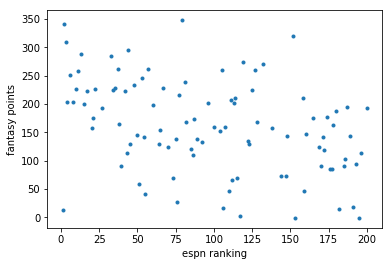

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['2017 projected ranking'], results['2017 points'], '.')
plt.xlabel('espn ranking')
plt.ylabel('fantasy points')

20.Is there a downward trend? Why does this make sense?

In [355]:
#because a ranking of 1 corresponds to the most projected points, etc.

21.We can create a line of best fit:

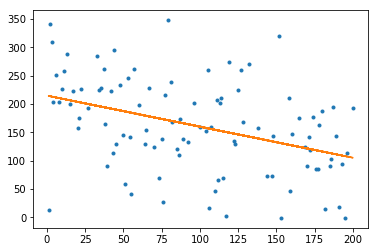

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = results['2017 projected ranking']
y = results['2017 points']
fit = np.polyfit(x, y,1)
fit_fn = np.poly1d(fit) 
plt.plot(x, y,'.', x, fit_fn(x))

22.Print the slope and intercept of the line. 

In [24]:
m, b = np.polyfit(x,y,1)
print(m,b)

-0.5476898833546299 214.90756651754657


23.Create another column in the results dataframe called "predicted points" that lists the predicted points from the line of best fit for each player. 

In [21]:
results['predicted points'] = fit_fn(results['2017 projected ranking'])

24.Create another column called "residual" that lists the difference between the actual 2017 points and the predicted ESPN points.

In [22]:
results['residual'] = results['2017 points'] - results['predicted points']

25.Sort the dataframe by residuals from lowest to highest to see the most overrated players.

In [11]:
results.sort_values(by = 'residual', ascending = True).head()

,player,positions,2017 points,2017 projected ranking,predicted points,residual
114,"David Johnson, ARI",RB,13.0,1,214.359877,-201.359877
117,"Kevin White, CHI",WR,2.6,117,150.827850,-148.227850
109,"Terrance West, BAL",RB,28.1,76,173.283135,-145.183135
107,"Greg Olsen, CAR",TE,42.1,55,184.784623,-142.684623
112,"C.J. Prosise, SEA",RB,17.0,106,156.852439,-139.852439


26.R-squared is a measure of how well your model fits your data. Use the function below to calculate R-squared.

In [12]:
def rsquared(x, y, y_predicted):                   
    ybar = np.sum(y)/len(y)          
    ssreg = np.sum((y_predicted-ybar)**2)  
    sstot = np.sum((y - ybar)**2)  
    return ssreg / sstot

rsquared(results['2017 projected ranking'], 
         results['2017 points'], 
         results['predicted points'])

0.15937674459960785

27.Rather than needing to write the above rsquared function manually, we can use a Python stats package called statsmodels.

In [15]:
import statsmodels.api as sm

X = results['2017 projected ranking']
Y = results['2017 points']
X = sm.add_constant(X) #An interecept is not included by default and should be added by the user - kinda annoying
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            2017 points   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     18.20
Date:                Thu, 21 Jun 2018   Prob (F-statistic):           4.66e-05
Time:                        06:08:41   Log-Likelihood:                -561.76
No. Observations:                  98   AIC:                             1128.
Df Residuals:                      96   BIC:                             1133.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    214.9076     14.624     14.696      0.000     185.879     243.936
2017 projected ranking    -0.5477      0.128     -4.266      0.000      -0.803      -0.293
==============================================================================
Omnibus:                        0.342   Durbin-Watson:                   0.337
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.316
Skew:                          -0.133   Prob(JB):                        0.854
Kurtosis:                       2.916   Cond. No.                         219.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

28.Thus, 15.9% of the variation in fantasy points scored can be attributed to variation in ESPN projected ranking. That's pretty low. Let's see if we can do better by adding another variable: position. 

Up until now, you've only been able to create predictive models with numerical variables (e.g. rankings, points, etc.) However, we can also create regression models using categorical variables (such as football position!) Very exciting. 

In addition, up until now, you have probably only calculated a linear regression line when you have a single input variable. Today, we'll use multiple linear regression (where the input will be a matrix instead of a single vector).

Our goal will be to use ESPN rankings (numerical) AND player position (categorical) to predict their fantasy points.

Step 1: Create a new dataframe from the results dataframe called onehot that includes just the positions and ranking columns. (I'll explain why it's called onehot in a minute).

In [23]:
onehot = results[['2017 projected ranking','positions']]
onehot.head()

,2017 projected ranking,positions
0,79,QB
1,2,RB
2,152,RB
3,3,WR
6,44,QB


29.Now, a major step towards performing regression when there are categorical variables involved is first creating a matrix (called a one-hot matrix) where each position corresponds to a different column in the matrix. For example, if a player is a QB, he'll have a 1 in the QB column and a 0 in all of the others. We can do this by adding dummy columns:


In [24]:
input_data = results[['2017 projected ranking','positions']]
one_hot = pd.get_dummies(results['positions'])
input_data = input_data.drop('positions', axis = 1)
input_data = input_data.join(one_hot)
input_data.head()

,2017 projected ranking,QB,RB,TE,WR
0,79,1,0,0,0
1,2,0,1,0,0
2,152,0,1,0,0
3,3,0,0,0,1
6,44,1,0,0,0


30.Okay. Our input is going to be this matrix and our output is going to be the 2017 points. We'll need to download the scikit-learn package in order to use the the multiple linear regression model. scikit-learn is the most popular package for maching learning algorithms using Python. So exciting!!!

Type this into your terminal:

pip install scikit-learn

If that doesn't work, try typing:

conda install -c conda-forge scikit-learn

Then, run the following code.

In [26]:
from sklearn.linear_model import LinearRegression

X = input_data
y = results['2017 points']

model = LinearRegression()
model.fit(X, y)
print(len(model.predict(X)), len(y))
print('R-squared', model.score(X,y))

98 98
R-squared 0.36078149047291974


/Users/shareshianl/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


31.Wow! Our R-squared doubled when we incorporated the player position into our input. Here's a summary of our model:

In [33]:
X = input_data
y = results['2017 points']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            2017 points   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     13.12
Date:                Thu, 21 Jun 2018   Prob (F-statistic):           1.63e-08
Time:                        06:19:50   Log-Likelihood:                -548.34
No. Observations:                  98   AIC:                             1107.
Df Residuals:                      93   BIC:                             1120.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    186.3323     11.243     16.574      0.000     164.007     208.658
2017 projected ranking    -0.6086      0.114     -5.319      0.000      -0.836      -0.381
QB                       109.9800     15.197      7.237      0.000      79.801     140.159
RB                        -1.3246     10.842     -0.122      0.903     -22.856      20.206
TE                        40.4493     18.659      2.168      0.033       3.396      77.502
WR                        37.2276     10.725      3.471      0.001      15.930      58.525
==============================================================================
Omnibus:                        4.032   Durbin-Watson:                   0.697
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                4.895
Skew:                          -0.032   Prob(JB):                       0.0865
Kurtosis:                       4.093   Cond. No.                     1.35e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.98e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

32.Let's visualize what is going on with this multiple linear regression by creating the following plot below:

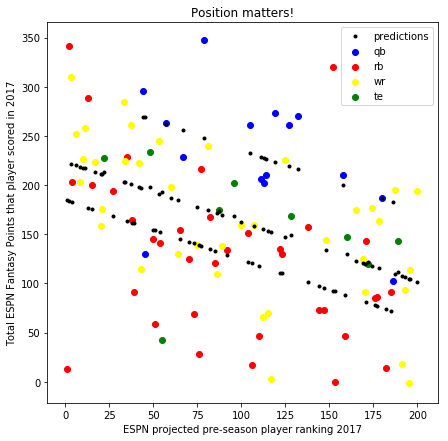

In [34]:
quarterbacks = results[results['positions'] == 'QB']
runningbacks = results[results['positions'] == 'RB']
receivers = results[results['positions'] == 'WR']
tightends = results[results['positions'] == 'TE']

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(quarterbacks['2017 projected ranking'], quarterbacks['2017 points'],  color='blue', label='qb')
ax.scatter(runningbacks['2017 projected ranking'], runningbacks['2017 points'],  color='red', label='rb')
ax.scatter(receivers['2017 projected ranking'], receivers['2017 points'],  color='yellow', label = 'wr')
ax.scatter(tightends['2017 projected ranking'], tightends['2017 points'],  color='green', label = 'te')

ax.plot(X['2017 projected ranking'].values, model.predict(X), 'k.', label = 'predictions')
ax.set_xlabel('ESPN projected pre-season player ranking 2017')
ax.set_ylabel('Total ESPN Fantasy Points that player scored in 2017')
ax.set_title('Position matters!')
ax.legend(loc='best')

33.Explain in your own words why your multiple linear regression model is plotting the black dots in the manner that you see above.

In [ ]:
#different linear lines for different positions

Note: You've just explored the very beginnings of using Python to perform machine learning! Machine learning is a pretty ill defined term, but according to Wikipedia, "Machine learning explores the construction and study of algorithms that can learn from and make predictions on data." 

You have just learned the multiple linear regression sci-kit learn method. There are many MUCH better methods (RidgeCV, GradientBoostingRegressor, etc.)

There are also better measures for how well a model does. (The adjusted R-squared measure is MUCH better than the R-squared measure.)

In addition, we just committed the cardinal sin of data science in the above example, which is to use our entire dataset to train our model. In practice, we should have used just a subset of the player data to train our model (i.e., to calculate the line of best fit) and then we should have calculated how well our model did at predicting the test set values (the players that we didn't include in our training model).

To learn more, this is a great first tutorial on how to use sci-kit learn for machine learning:

https://www.datacamp.com/community/tutorials/machine-learning-python

More docs are here:

http://scikit-learn.org/stable/tutorial/basic/tutorial.html

And Andrew Ng's online Machine Learning course is famous:

https://www.coursera.org/learn/machine-learning


